In [24]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image
from tqdm import tqdm

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T

import torchvision.transforms.functional as TF
import torchvision.models as models

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [14]:
DATA_DIR = "/Volumes/SSD970/"
# DATA_DIR = "/root/autodl-tmp/cervical_spine/"
IMAGES_DIR = os.path.join("/Volumes/SSD9701/", "train_axial_images_jpeg95")

In [31]:
total_df = pd.read_csv(os.path.join(DATA_DIR, 'infer_detection_score.csv')).set_index('index')
total_df = total_df.fillna(0.0)
print(len(total_df))
total_df.iloc[100:150]

708779


,UID,z_spacing,pixel_spacing,aspect,is_flip,patient_overall,C1,C2,C3,C4,...,axial_index,class_index,class_value,bbox_area,bbox_seg_area,bbox_xmin,bbox_ymin,bbox_xmax,bbox_ymax,bbox_score
index,,,,,,,,,,,,,,,,,,,,,
100,1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,...,100.0,2.0,2.0,0.140579,0.091935,79.318260,199.154312,301.093689,365.529938,0.020178
101,1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,...,101.0,2.0,2.0,0.126892,0.096200,85.672935,204.173996,301.108154,358.508057,0.013273
102,1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,...,102.0,2.0,2.0,0.027100,0.561374,230.504486,189.149139,304.414551,285.134521,0.022776
103,1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,...,103.0,0.0,0.0,0.093567,0.000000,328.620087,-38.443001,475.168457,131.328934,0.012729
104,1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,...,104.0,2.0,2.0,0.035248,0.479221,225.005600,187.549606,335.031708,271.421082,0.028590
105,1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,...,105.0,2.0,2.0,0.037766,0.406869,221.140213,185.625961,331.700531,274.248749,0.114510
106,1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,...,106.0,2.0,2.0,0.038055,0.350040,219.497589,185.722076,335.034302,271.051239,0.024005
107,1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,...,107.0,0.0,0.0,0.116730,0.000000,320.328308,-45.024319,490.582153,136.374283,0.018379
108,1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,...,108.0,0.0,0.0,0.093079,0.000000,123.544029,329.466248,367.082184,428.453461,0.011806


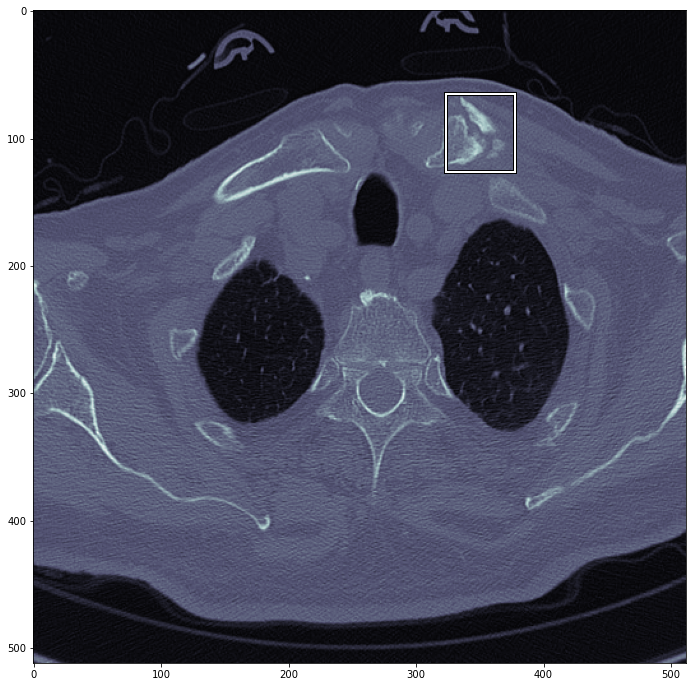

In [32]:
def draw_bbox(plot_ax,bbox):
    bottom_left, width, height = (bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1]

    rect_1 = patches.Rectangle(
        bottom_left,
        width,
        height,
        linewidth=4,
        edgecolor="black",
        fill=False,
    )
    rect_2 = patches.Rectangle(
        bottom_left,
        width,
        height,
        linewidth=2,
        edgecolor="white",
        fill=False,
    )

    # Add the patch to the Axes
    plot_ax.add_patch(rect_1)
    plot_ax.add_patch(rect_2)

def show_bbox(index):
    fig, ax = plt.subplots(1, figsize=(12, 12))
    s = total_df.iloc[index]
    img = Image.open(os.path.join(IMAGES_DIR, s.UID, f'{int(s.axial_index)}.jpeg'))
    ax.imshow(img, cmap='bone')

    draw_bbox(ax, s[['bbox_xmin','bbox_ymin','bbox_xmax','bbox_ymax']])

    plt.show()

show_bbox(33487)

In [33]:
# only pick class_index is not nan and 0
UIDs = total_df.UID.unique()
len(UIDs)

2012

class_index 가 없는 애들은 그냥 그전 slice 의 class_index 를 따른다.
처음 1 번이 시작하는 곳부터 7번이 끝나는 곳까지 data 로 한다.


In [35]:
train_df = total_df.set_index('UID')
train_df[['bbox_xmin','bbox_ymin','bbox_xmax','bbox_ymax']] = train_df[['bbox_xmin','bbox_ymin','bbox_xmax','bbox_ymax']] / 512.
train_df["class_dist"] = train_df["class_value"] - train_df["class_index"]
train_df.iloc[100:120]

,z_spacing,pixel_spacing,aspect,is_flip,patient_overall,C1,C2,C3,C4,C5,...,class_index,class_value,bbox_area,bbox_seg_area,bbox_xmin,bbox_ymin,bbox_xmax,bbox_ymax,bbox_score,class_dist
UID,,,,,,,,,,,,,,,,,,,,,
1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,0,...,2.0,2.0,0.140579,0.091935,0.154918,0.388973,0.588074,0.713926,0.020178,0.0
1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,0,...,2.0,2.0,0.126892,0.096200,0.167330,0.398777,0.588102,0.700211,0.013273,0.0
1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,0,...,2.0,2.0,0.027100,0.561374,0.450204,0.369432,0.594560,0.556903,0.022776,0.0
1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,0,...,0.0,0.0,0.093567,0.000000,0.641836,-0.075084,0.928063,0.256502,0.012729,0.0
1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,0,...,2.0,2.0,0.035248,0.479221,0.439464,0.366308,0.654359,0.530119,0.028590,0.0
1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,0,...,2.0,2.0,0.037766,0.406869,0.431914,0.362551,0.647853,0.535642,0.114510,0.0
1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,0,...,2.0,2.0,0.038055,0.350040,0.428706,0.362738,0.654364,0.529397,0.024005,0.0
1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,0,...,0.0,0.0,0.116730,0.000000,0.625641,-0.087938,0.958168,0.266356,0.018379,0.0
1.2.826.0.1.3680043.10001,0.625,0.253906,2.461541,0,0,0,0,0,0,0,...,0.0,0.0,0.093079,0.000000,0.241297,0.643489,0.716957,0.836823,0.011806,0.0


In [48]:
train_df.iloc[36870:36890]["class_index"].idxmax()

'1.2.826.0.1.3680043.12013'

In [61]:
class ScoreDataset(Dataset):
    def __init__(self, df, UIDs):
        super().__init__()

        self.df = df
        self.UIDs = UIDs

    def __len__(self):
        return len(self.UIDs)

    def __getitem__(self, idx):
        UID = UIDs[idx]
        df = self.df.loc[UID].reset_index()

        # TODO: 여기를 class_index=1 부터 7까지 뽑아내고 train 해바라. 더 좋은지

        score = np.zeros((len(df), 8))
        score[np.arange(len(df)), np.uint8(df.class_index.values)] = df.bbox_score

        data = df[['z_spacing','pixel_spacing','bbox_area','bbox_seg_area','bbox_xmin','bbox_ymin','bbox_xmax','bbox_ymax','class_dist']].values
        data = np.concatenate((data, score), axis=1)

        label = df.iloc[0][['patient_overall','C1','C2','C3','C4','C5','C6','C7']].values

        data = data[:1000]  # 제일 많아서 1000개만

        return data, label

ds = ScoreDataset(train_df, UIDs[:10])
x, y = ds[3]

print(x.shape, y.shape)
print(y)
x

(645, 17) (8,)
[1 0 1 0 0 0 0 0]


array([[0.313   , 0.275391, 0.      , ..., 0.      , 0.      , 0.      ],
       [0.313   , 0.275391, 0.      , ..., 0.      , 0.      , 0.      ],
       [0.313   , 0.275391, 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.313   , 0.275391, 0.      , ..., 0.      , 0.      , 0.      ],
       [0.313   , 0.275391, 0.      , ..., 0.      , 0.      , 0.      ],
       [0.313   , 0.275391, 0.      , ..., 0.      , 0.      , 0.      ]])

In [63]:
class ScoreModel(nn.Module):
    def __init__(self, seq_len, in_channels, rnn_channels,rnn_layers, ff_channels):
        super().__init__()

        self.rnn = nn.GRU(
            in_channels,
            rnn_channels,
            num_layers=rnn_layers,
            batch_first=True,
            bidirectional=True
        )
        # self.maxpool = nn.AdaptiveMaxPool1d()
        self.ff = nn.Sequential(
            nn.Linear(rnn_channels * 2, ff_channels),
            nn.ReLU(),
            nn.Linear(ff_channels, 8)
        )

    def forward(self, x):
        out, hn = self.rnn(x)
        # print(out.shape)
        out = out.amax(dim=1)
        # print(out.shape)
        out = self.ff(out).sigmoid()
        return out

model = ScoreModel(None, 17, 128, 2, 128)
input = torch.tensor(x, dtype=torch.float).unsqueeze(0)
model(input)

torch.Size([1, 645, 256])
torch.Size([1, 256])


tensor([[0.4901, 0.5110, 0.4870, 0.5005, 0.4984, 0.4823, 0.4709, 0.5082]],
       grad_fn=<SigmoidBackward0>)